In [4]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [5]:
# EDA 함수 정의
def eda(df, target):
    # 이상치 확인 함수 정의
    def detect_outliers(df, features):
        outlier_indices = []

        for c in features:
            # 1st quartile
            Q1 = np.percentile(df[c], 25)
            # 3rd quartile
            Q3 = np.percentile(df[c], 75)
            # IQR
            IQR = Q3 - Q1
            # Outlier step
            outlier_step = IQR * 1.5
            # Detect outlier and their indices
            outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
            # Store indices
            outlier_indices.extend(outlier_list_col)

        outlier_indices = np.array(outlier_indices)
        return np.unique(outlier_indices)

    print("===== Data Summary =====")
    # 중복 값 확인
    duplicates = df.duplicated().sum()

    # 결측치 확인
    missing = df.isnull().sum().sum()

    # 타겟 칼럼의 클래스 비율 확인
    class_ratio = df[target].value_counts(normalize=True)

    print(f"Number of duplicates: {duplicates}")
    print(f"Number of missing values: {missing}")
    print(f"Class ratio in {target} column:")
    print(class_ratio)

    # 이상치 확인
    num_cols = df.select_dtypes(include=[np.number]).columns
    outliers = detect_outliers(df, num_cols)
    print(f"Number of outliers: {len(outliers)}")
    
    print("\n===== Data Visualization =====")
    # 히스토그램
    df.hist(bins=30, figsize=(15,10))
    plt.tight_layout()
    plt.show()

    # 상관관계 히트맵
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.show()



===== Data Summary =====
Number of duplicates: 0
Number of missing values: 0
Class ratio in Rings column:
9     0.164951
10    0.151784
8     0.135983
11    0.116591
7     0.093608
12    0.063921
6     0.062006
13    0.048599
14    0.030165
5     0.027532
15    0.024659
16    0.016040
17    0.013886
4     0.013646
18    0.010055
19    0.007661
20    0.006225
3     0.003591
21    0.003352
23    0.002155
22    0.001436
27    0.000479
24    0.000479
1     0.000239
26    0.000239
29    0.000239
2     0.000239
25    0.000239
Name: Rings, dtype: float64
Number of outliers: 396

===== Data Visualization =====


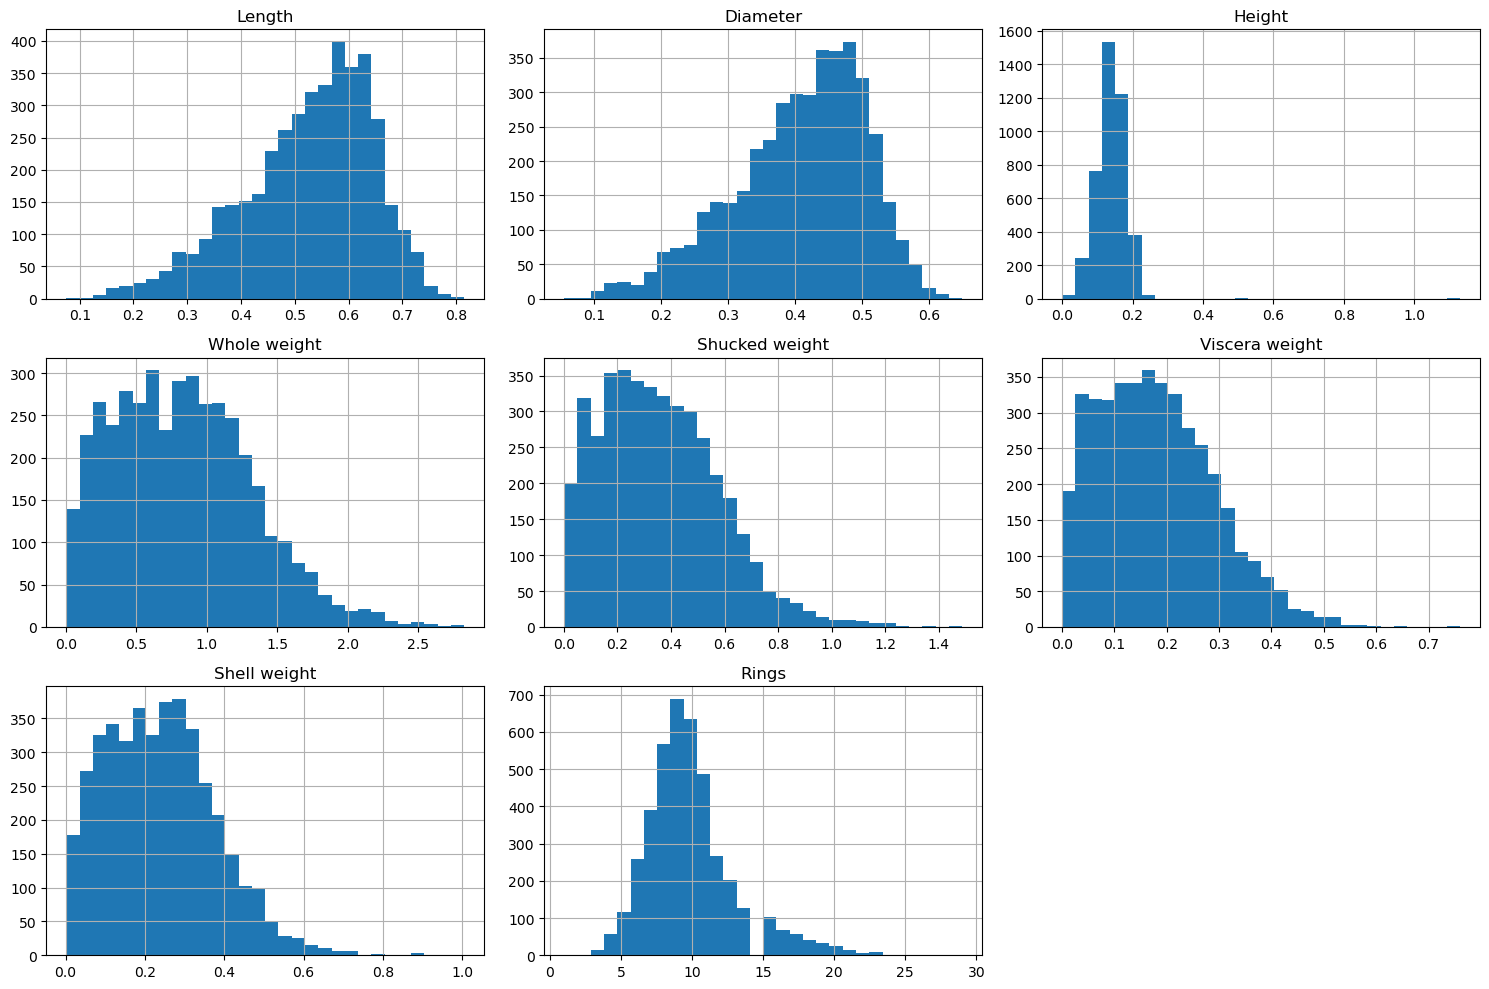

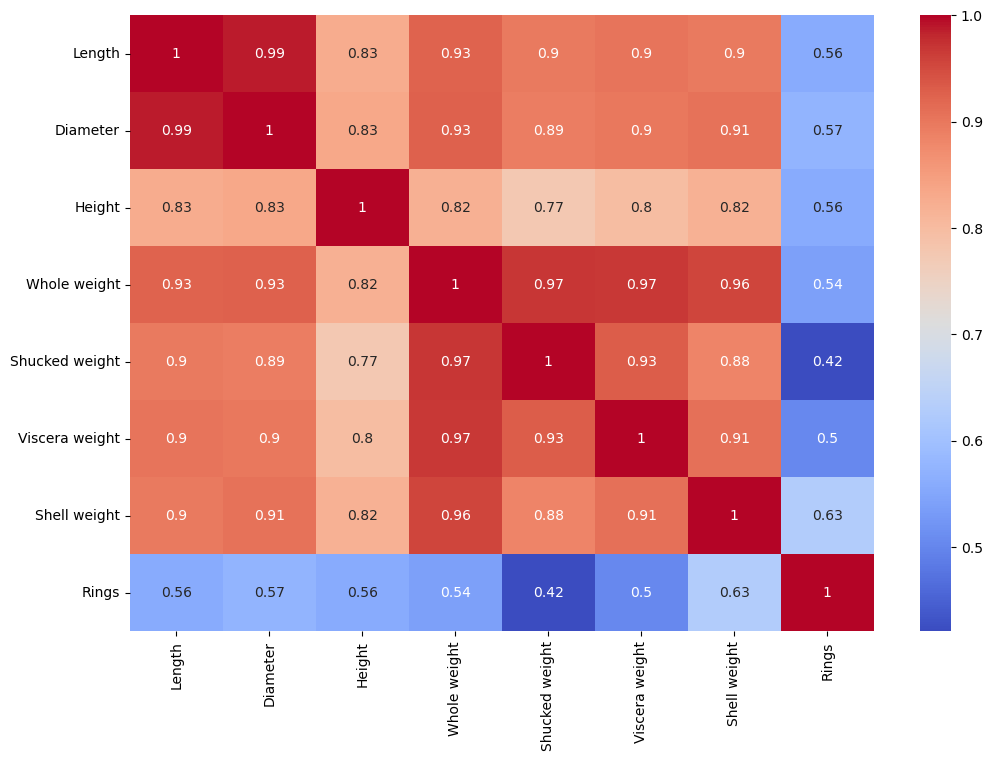

In [6]:
# 데이터 로드
data = pd.read_csv('./data/Regression_data.csv')

# 함수 테스트
eda(data, 'Rings')

===== Data Summary =====
Number of duplicates: 0
Number of missing values: 0
Class ratio in target_class column:
0    0.908426
1    0.091574
Name: target_class, dtype: float64
Number of outliers: 4727

===== Data Visualization =====


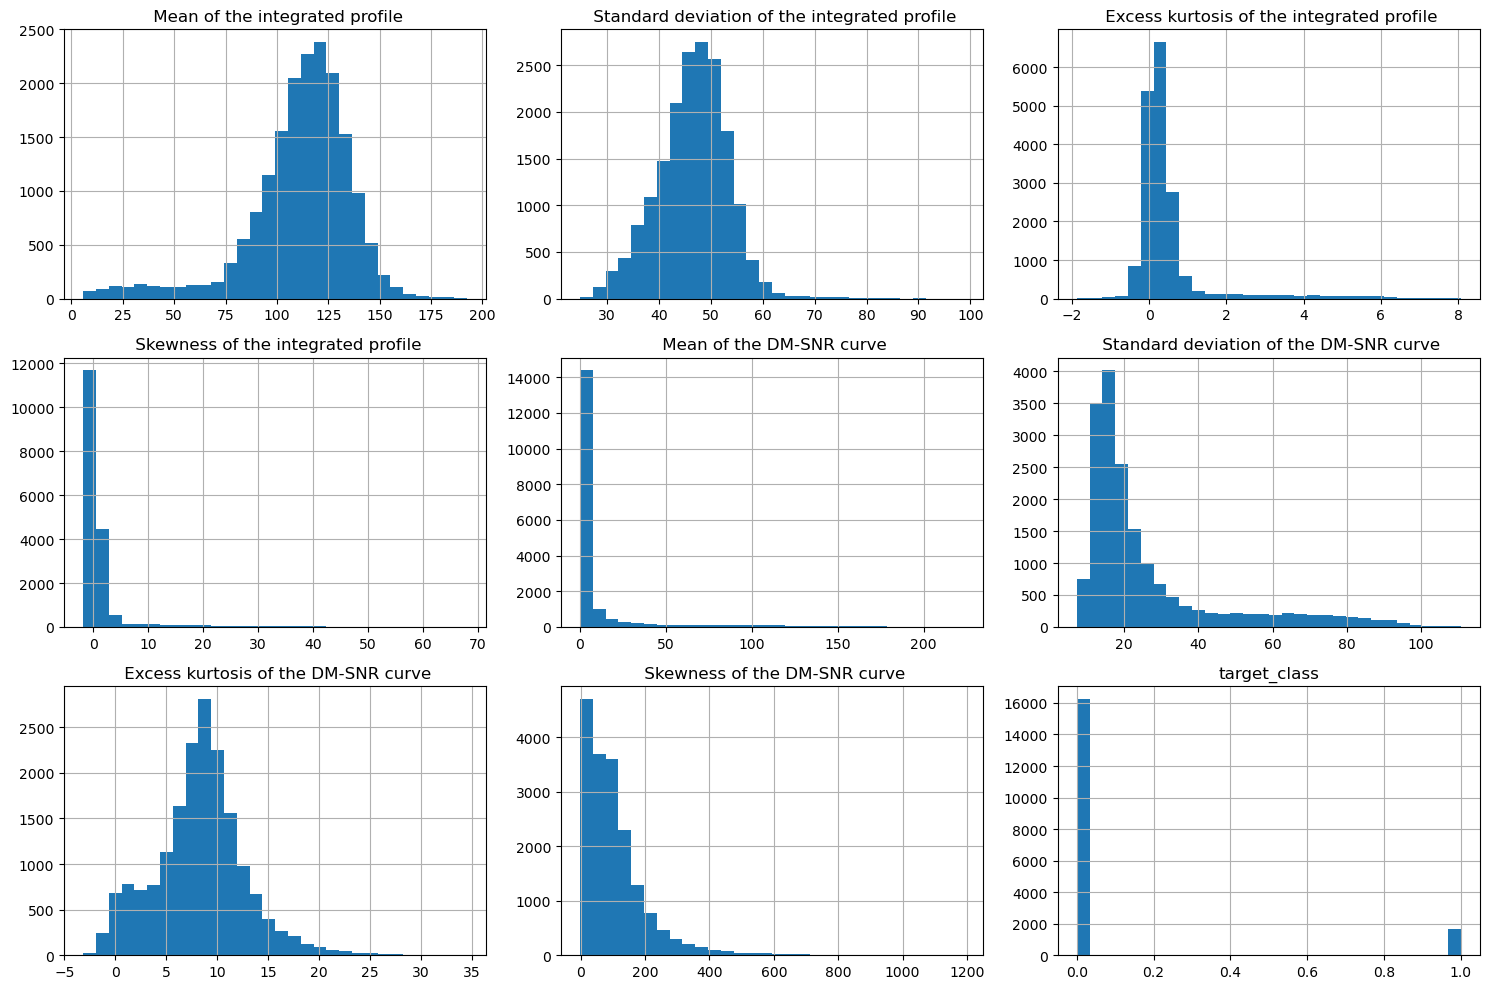

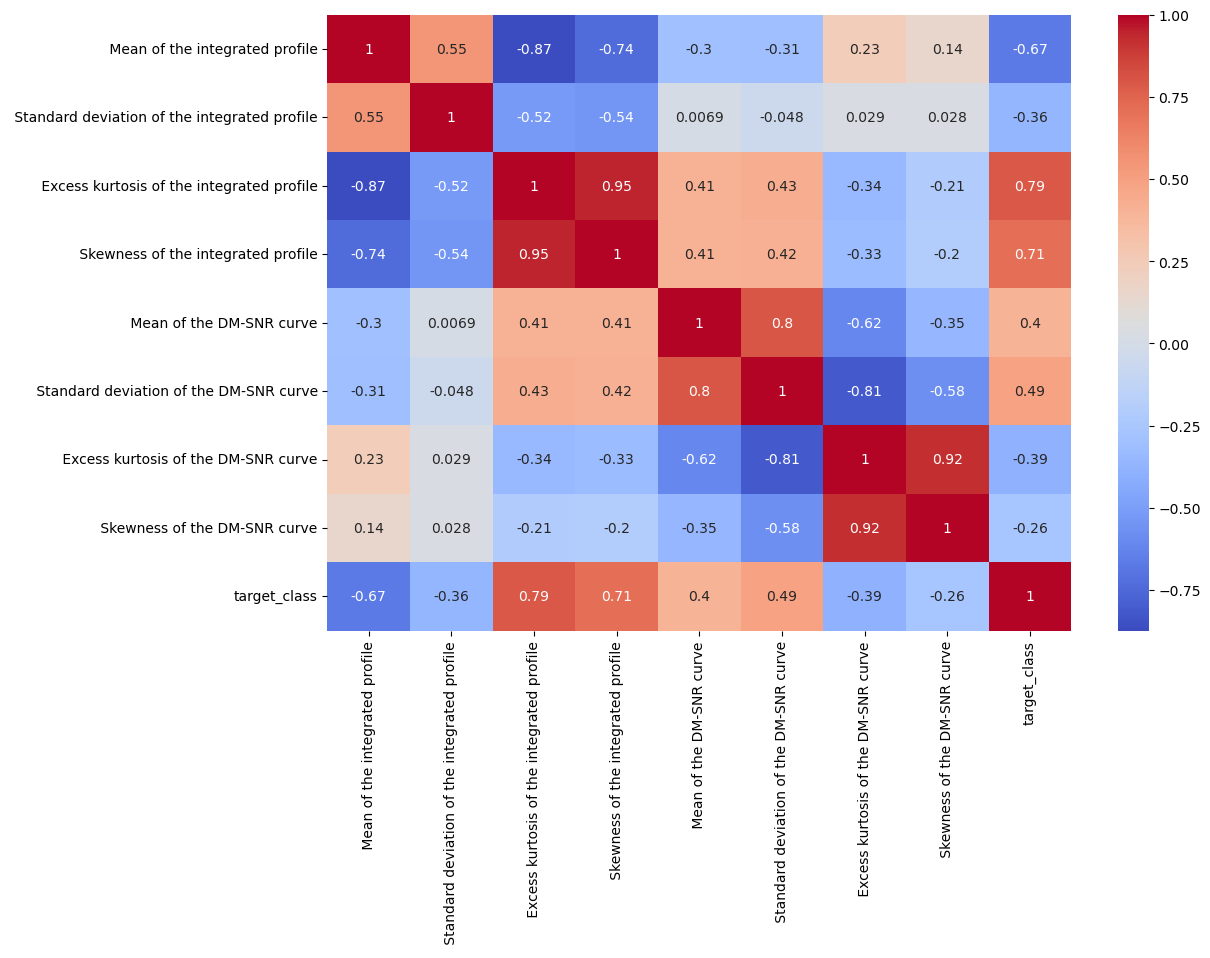

In [7]:
# 데이터 로드
data = pd.read_csv('./data/binary_classification_data.csv')

# 함수 테스트
eda(data, 'target_class')

VIF(Variance Inflation Factor)는 회귀 분석에서 독립 변수들 간의 다중공선성을 측정하는 지표입니다. 다중공선성은 두 개 이상의 독립 변수들이 서로 상관관계가 높을 때 발생하는 문제입니다. 이러한 상황에서는 회귀 계수의 추정이 부정확해지며, 이로 인해 모델의 예측 성능이 저하될 수 있습니다.

VIF는 특정 독립 변수를 다른 독립 변수들로 회귀시킨 결과를 바탕으로 계산됩니다. 특정 독립 변수를 종속 변수로, 그 외의 독립 변수들을 독립 변수로 하는 회귀 모델을 만들어서, 그 모델의 결정 계수(R-squared)를 구합니다. 그리고 이 결정 계수를 이용해 VIF를 계산합니다. VIF의 계산식은 다음과 같습니다:


$VIF$ = $\frac{1}{1 - R^2}$


여기서 $R^2$ 는 특정 독립 변수를 다른 독립 변수들로 회귀시킨 모델의 결정 계수입니다.

VIF 값이 1에 가까우면 해당 독립 변수가 다른 독립 변수들과 거의 상관관계가 없다는 것을 의미하며, VIF 값이 5를 초과하면 해당 독립 변수가 다른 독립 변수들과 높은 상관관계를 가지고 있다는 것을 의미합니다. 일반적으로 VIF 값이 5 이상인 독립 변수는 다중공선성 문제가 있을 가능성이 높다고 판단합니다.

VIF 값을 줄이기 위한 방법으로는 변수 선택, 차원 축소, 정규화 등이 있습니다. 이러한 방법들은 다중공선성 문제를 완화시키고, 회귀 모델의 예측 성능을 향상시키는 데 도움이 될 수 있습니다.

1. 차원축소
3. 정규화

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 데이터 로드
data = pd.read_csv('./data/Regression_data.csv')

# 'Sex' column 인코딩
data = pd.get_dummies(data, columns=['Sex'])

# 독립변수들 추출
X = data.drop('Rings', axis=1)

# VIF DataFrame
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

,variables,VIF
0,Length,40.945763
1,Diameter,42.379841
2,Height,3.581369
3,Whole weight,109.768710
4,Shucked weight,28.550546
5,Viscera weight,17.445012
6,Shell weight,21.263272
7,Sex_F,23.079561
8,Sex_I,19.854572
9,Sex_M,25.751173


타겟 인코딩과 원-핫 인코딩은 범주형 변수를 처리하는 두 가지 인기 있는 방법입니다. 두 방법 사이에서 선택을 할 때는 데이터의 특성과 모델의 요구 사항에 따라 결정합니다.

원-핫 인코딩은 각 범주를 새로운 이진 특성으로 변환하는 방법입니다. 이 방법은 선형 모델 같은 경우에 유용합니다. 원-핫 인코딩의 장점은 각 범주를 독립적으로 취급하므로 범주 간의 순서나 중요도를 가정하지 않는다는 것입니다. 그러나 범주의 수가 많을 경우 데이터의 차원이 크게 증가하므로, 이는 계산 비용을 증가시키고, 모델의 성능을 저하시킬 수 있습니다.

타겟 인코딩은 범주를 타겟 변수의 평균 값으로 변환하는 방법입니다. 이 방법은 범주의 수가 많을 때 유용하며, 특히 트리 기반 모델에서 좋은 성능을 보입니다. 타겟 인코딩의 장점은 범주의 수에 상관없이 데이터의 차원을 증가시키지 않는다는 것입니다. 그러나 이 방법은 과적합(overfitting)의 위험이 있으며, 데이터 누출(data leakage)를 방지하기 위한 적절한 교차 검증 방법이 필요합니다.

따라서, 선택을 할 때는 다음과 같은 사항을 고려해야 합니다:

범주의 수: 범주의 수가 많으면 원-핫 인코딩은 많은 수의 특성을 생성하므로, 타겟 인코딩이 더 적합할 수 있습니다.
모델 유형: 선형 모델은 원-핫 인코딩을, 트리 기반 모델은 타겟 인코딩을 선호할 수 있습니다.
데이터 누출과 과적합 문제: 타겟 인코딩은 데이터 누출과 과적합 문제를 일으킬 수 있으므로, 이를 방지하기 위한 적절한 방법이 필요합니다.

단계적 선택법(Stepwise Selection): 이 방법은 전진 선택법과 후진 제거법을 결합한 방식입니다. 즉, 변수를 하나씩 추가하거나 제거하여 모델의 성능이 향상될 때까지 반복적으로 모델을 조정합니다. 하지만, 이 방법은 여러 통계적 문제를 일으킬 수 있으며, 결과 모델의 선택은 시작점에 따라 달라질 수 있습니다.

Lasso Regression (L1 정규화): Lasso 회귀는 회귀 계수를 제한하여 일부 변수의 계수를 0으로 만드는 방법입니다. 이는 자연스럽게 변수 선택의 효과를 주며, 모델의 복잡성을 제어하는 데 도움이 됩니다.

Random Forest의 변수 중요도: 랜덤 포레스트 같은 트리 기반 모델은 변수 중요도를 측정하는 기능을 제공합니다. 이를 이용해 중요도가 높은 변수들만을 선택하는 방법도 있습니다.

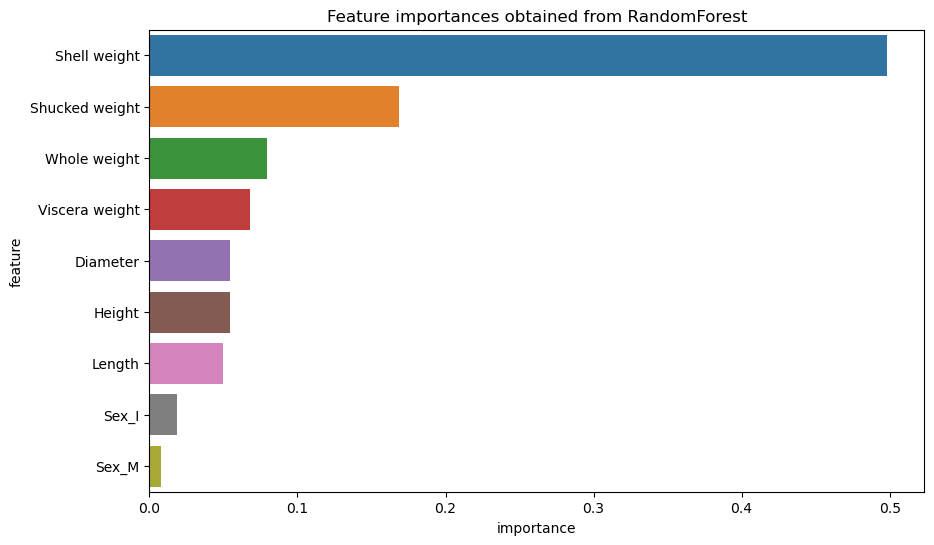

6      Shell weight
4    Shucked weight
3      Whole weight
5    Viscera weight
1          Diameter
Name: feature, dtype: object

In [11]:
# 필요한 라이브러리 불러오기
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
data = pd.read_csv('./data/Regression_data.csv')

# 원-핫 인코딩
data_encoded = pd.get_dummies(data, columns=['Sex'], drop_first=True)

# 독립변수와 종속변수 분리
X = data_encoded.drop('Rings', axis=1)
y = data_encoded['Rings']

# 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 변수 중요도 추출
importances = model.feature_importances_
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# 변수 중요도를 내림차순으로 정렬
feature_importances_sorted = feature_importances.sort_values(by='importance', ascending=False)

# 변수 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances_sorted)
plt.title('Feature importances obtained from RandomForest')
plt.show()

# 상위 변수 출력
top_features = feature_importances_sorted['feature'][:5]
top_features


In [12]:
X_train.shape

(3341, 9)

In [14]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

top_features = feature_importances_sorted['feature'][:8]

# 상위 5개 변수만 선택
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train_selected, y_train)

# 훈련 세트에서의 예측과 성능 평가
train_preds = model.predict(X_train_selected)
train_rmse = mean_squared_error(y_train, train_preds, squared=False)

# MSE 계산
test_preds = model.predict(X_test_selected)
test_rmse = mean_squared_error(y_test, test_preds, squared=False)

# MAE 계산
train_mae = mean_absolute_error(y_train, train_preds)
test_mae = mean_absolute_error(y_test, test_preds)

# R^2 Score 계산
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

# Adjusted R^2 Score 계산
train_adj_r2 = 1 - (1-train_r2)*(len(y_train)-1)/(len(y_train)-X_train_selected.shape[1]-1)
test_adj_r2 = 1 - (1-test_r2)*(len(y_test)-1)/(len(y_test)-X_test_selected.shape[1]-1)

# 모든 성능 지표 출력
train_mse = train_rmse**2
test_mse = test_rmse**2
performance_metrics = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R^2 Score', 'Adjusted R^2 Score'],
    'Train': [train_mse, train_rmse, train_mae, train_r2, train_adj_r2],
    'Test': [test_mse, test_rmse, test_mae, test_r2, test_adj_r2]
})
performance_metrics


,Metric,Train,Test
0,MSE,4.785616,4.885050
1,RMSE,2.187605,2.210215
2,MAE,1.576846,1.591400
3,R^2 Score,0.534653,0.548734
4,Adjusted R^2 Score,0.533536,0.544369



$R^2$  (결정 계수)는 회귀 모델이 데이터를 얼마나 잘 설명하는지를 나타내는 지표입니다. 
$R^2$
  값은 0부터 1까지 범위를 가지며, 1에 가까울수록 모델이 데이터를 잘 설명하고 있다는 것을 의미합니다. 
$R^2$
  값은 모델에 추가적인 독립변수가 들어갈 때마다 일반적으로 증가하거나 동일하게 유지됩니다. 이는 추가적인 독립변수가 모델에 아무런 정보를 추가하지 않더라도 
$R^2$
  값이 감소하지 않기 때문입니다.

**Adjusted 
$R^2$
 **는 
$R^2$
 의 이러한 단점을 보완하기 위해 사용되는 지표입니다. Adjusted 
$R^2$
 는 독립변수의 수를 고려하여 
$R^2$
 를 조정합니다. 즉, 독립변수가 추가될 때마다 penalty를 부여하여 모델의 복잡성을 고려합니다. 이로 인해 불필요한 독립변수가 추가될 경우 Adjusted 
$R^2$
  값이 감소하게 됩니다. 따라서 Adjusted 
$R^2$
 는 모델의 복잡성과 데이터를 설명하는 능력 사이의 균형을 잡는 데 도움이 됩니다.